In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.contrib.keras.python.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout, Activation
from tensorflow.contrib.keras.python.keras.models import Model, Sequential
from tensorflow.contrib.keras.python.keras.optimizers import RMSprop
from tensorflow.contrib.keras.python.keras.callbacks import EarlyStopping
from tensorflow.contrib.keras.python.keras.utils import to_categorical

In [2]:
# variables

batch_size = 128
num_classes = 7
epochs = 100

In [3]:
# dataset loading

dataset_file = 'dataset/fer2013/fer2013.csv'
data = np.genfromtxt(dataset_file, dtype=None, delimiter=',', skip_header=1) 

In [4]:
x_train = []
y_train = []
x_test1 = []
y_test1 = []
x_test2 = []
y_test2 = []

In [5]:
for i in range(len(data)):
    if data[i][2] == b'Training':
        x_train.append(data[i][1].split(sep=b' '))
        y_train.append(to_categorical(data[i][0], num_classes=num_classes))
    elif data[i][2] == b'PublicTest':
        x_test1.append(data[i][1].split(sep=b' '))
        y_test1.append(to_categorical(data[i][0], num_classes=num_classes))
    else:
        x_test2.append(data[i][1].split(sep=b' '))
        y_test2.append(to_categorical(data[i][0], num_classes=num_classes))
               

In [6]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test1 = np.array(x_test1)
y_test1 = np.array(y_test1)
x_test2 = np.array(x_test2)
y_test2 = np.array(y_test2)

In [7]:
x_train = x_train.reshape(x_train.shape[0], 48, 48)
x_test1 = x_test1.reshape(x_test1.shape[0], 48, 48)
x_test2 = x_test2.reshape(x_test1.shape[0], 48, 48)

In [8]:
x_train = np.expand_dims(x_train, axis=4)
x_test1 = np.expand_dims(x_test1, axis=4)
x_test2 = np.expand_dims(x_test2, axis=4)
y_train = y_train.reshape(-1, num_classes)
y_test1 = y_test1.reshape(-1, num_classes)
y_test2 = y_test2.reshape(-1, num_classes)

In [9]:
model = Sequential()

In [10]:
print(x_train.shape[0:])
print(y_train.shape)
print(y_train[0])

(28709, 48, 48, 1)
(28709, 7)
[ 1.  0.  0.  0.  0.  0.  0.]


In [11]:
model.add(Conv2D(64, (3, 3), padding='same', input_shape=(48, 48, 1)))
model.add(Activation('relu'))

In [12]:
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))

In [13]:
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [14]:
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))

In [15]:
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))

In [16]:
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [17]:
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))

In [18]:
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))

In [19]:
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))

In [20]:
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [21]:
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Activation('relu'))

In [22]:
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Activation('relu'))

In [23]:
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Activation('relu'))

In [24]:
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [25]:
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Activation('relu'))

In [26]:
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Activation('relu'))

In [27]:
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Activation('relu'))

In [28]:
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [29]:
model.add(Flatten())
model.add(Dense(4096))
model.add(Activation('relu'))
model.add(Dense(4096))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [30]:
# optimizer

opt = RMSprop(lr=0.0001, decay=1e-6)

In [31]:
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [32]:
early_stopping = tf.contrib.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [34]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test1, y_test1), shuffle=True, callbacks=[early_stopping])

Train on 28709 samples, validate on 3589 samples
Epoch 1/100
28709/28709 [==============================] - 52s - loss: 0.6726 - acc: 0.7528 - val_loss: 1.4990 - val_acc: 0.5876
Epoch 2/100
28709/28709 [==============================] - 53s - loss: 0.6324 - acc: 0.7674 - val_loss: 1.3734 - val_acc: 0.5968
Epoch 3/100
28709/28709 [==============================] - 53s - loss: 0.5851 - acc: 0.7861 - val_loss: 1.2402 - val_acc: 0.5993
Epoch 4/100
28709/28709 [==============================] - 53s - loss: 0.5519 - acc: 0.8000 - val_loss: 1.3201 - val_acc: 0.5882
Epoch 5/100
28709/28709 [==============================] - 53s - loss: 0.5158 - acc: 0.8133 - val_loss: 1.3146 - val_acc: 0.6060
Epoch 6/100
28709/28709 [==============================] - 53s - loss: 0.4898 - acc: 0.8228 - val_loss: 1.4088 - val_acc: 0.5826
Epoch 7/100
28709/28709 [==============================] - 53s - loss: 0.4618 - acc: 0.8339 - val_loss: 1.4355 - val_acc: 0.5985
Epoch 8/100
28709/28709 [=======================

In [36]:
import matplotlib.pyplot as plt

In [37]:
emotion = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

In [38]:
im = np.array(x_test1[0], dtype=np.uint8)

In [39]:
im = im.reshape(48, 48)

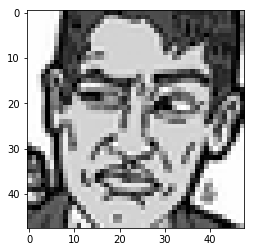

In [40]:
plt.imshow(im, cmap='gray')
plt.show()

In [37]:
pred[0]

NameError: name 'pred' is not defined

In [44]:
model.save('model_vgg16.h5')

In [45]:
model.save_weights('model_weights_vgg16.h5')

In [36]:
pred = model.predict_classes(x_test1, batch_size=128)

3584/3589 [============================>.] - ETA: 0s

In [34]:
len(pred)

3589

In [57]:
pred[:100]

array([0, 1, 4, 6, 3, 3, 2, 2, 3, 5, 3, 0, 4, 2, 6, 2, 5, 5, 5, 3, 4, 5, 4,
       6, 0, 6, 4, 4, 0, 5, 3, 6, 3, 6, 0, 6, 6, 2, 6, 3, 0, 4, 3, 6, 6, 0,
       5, 4, 5, 6, 6, 3, 5, 3, 3, 3, 2, 2, 5, 3, 6, 3, 4, 3, 5, 3, 5, 6, 0,
       2, 6, 5, 6, 3, 2, 6, 5, 6, 3, 2, 0, 0, 0, 3, 5, 4, 3, 3, 5, 3, 6, 2,
       6, 6, 0, 0, 5, 3, 3, 0])

In [42]:
accu = model.evaluate(x_test1, y_test1, batch_size=128)

3584/3589 [============================>.] - ETA: 0s

In [43]:
accu

[1.7313610190101638, 0.61688492616742863]

In [41]:
accu2 = model.evaluate(x_test2, y_test2, batch_size=128)

3584/3589 [============================>.] - ETA: 0s

In [43]:
accu2

[1.7180607131544545, 0.62886597941465849]

In [46]:
im = np.array(x_test1[1], dtype=np.uint8)
print(im.shape)
im = im.reshape(48, 48)
print(y_test1[1])

(48, 48, 1)
[0 1 0 0 0 0 0]


In [47]:
im.shape

(48, 48)

In [50]:
im

array([[156, 184, 198, ..., 157, 154, 150],
       [146, 182, 199, ..., 161, 154, 150],
       [135, 176, 195, ..., 165, 161, 155],
       ..., 
       [ 28,  25,  21, ..., 179, 175, 173],
       [ 29,  18,  22, ..., 177, 172, 169],
       [ 21,  14,  23, ..., 172, 167, 161]], dtype=uint8)

In [36]:
plt.imshow(im, cmap='gray')
plt.xlabel(emotion[pred[1]])
plt.show()

NameError: name 'plt' is not defined

In [50]:
im = np.array(x_test1[2], dtype=np.uint8)
im = im.reshape(48, 48)
print(y_test1[2])

[0 0 0 0 1 0 0]


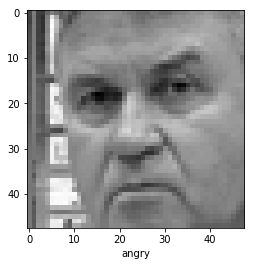

In [51]:
plt.imshow(im, cmap='gray')
plt.xlabel(emotion[pred[2]])
plt.show()

In [52]:
im = np.array(x_test1[3], dtype=np.uint8)
im = im.reshape(48, 48)
print(y_test1[3])

[0 0 0 0 0 0 1]


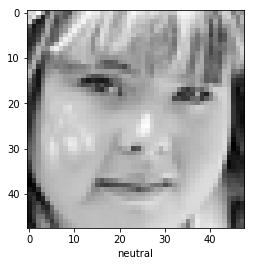

In [53]:
plt.imshow(im, cmap='gray')
plt.xlabel(emotion[pred[3]])
plt.show()

In [54]:
im = np.array(x_test1[4], dtype=np.uint8)
im = im.reshape(48, 48)

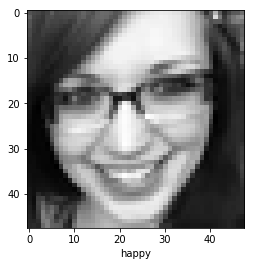

[0 0 0 1 0 0 0]


In [55]:
plt.imshow(im, cmap='gray')
plt.xlabel(emotion[pred[4]])
plt.show()
print(y_test1[4])